### Data Loading

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# Load data
pd.set_option('display.max_columns', None)
data = pd.read_csv("E:\College\cl\data (cl)\house_price\jabodetabek_house_price.csv")
data

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,hos11361759,2.0,1.0,72.0,36.0,1.0,shm - sertifikat hak milik,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,hos11359615,3.0,2.0,85.0,60.0,1.0,shm - sertifikat hak milik,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,hos11359594,3.0,2.0,78.0,60.0,1.0,shm - sertifikat hak milik,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,hos11359313,3.0,2.0,60.0,65.0,2.0,shm - sertifikat hak milik,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


### Data Preparation

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [107]:
print(data.describe())

        price_in_rp          lat         long     bedrooms    bathrooms  \
count  3.553000e+03  3553.000000  3553.000000  3519.000000  3524.000000   
mean   4.191685e+09    -6.324721   106.792881     3.326513     2.624858   
std    1.375067e+10     0.129245     0.172159     2.672148     2.696497   
min    4.200000e+07    -6.894828   106.402315     1.000000     1.000000   
25%    8.000000e+08    -6.397933   106.687295     2.000000     2.000000   
50%    1.500000e+09    -6.300733   106.799954     3.000000     2.000000   
75%    3.590000e+09    -6.231754   106.874766     4.000000     3.000000   
max    5.800000e+11    -6.102478   109.771691    99.000000    99.000000   

       land_size_m2  building_size_m2     carports  maid_bedrooms  \
count   3551.000000       3551.000000  3553.000000    3553.000000   
mean     204.806815        186.587440     1.197861       0.496482   
std      402.127746        248.443471     1.114996       0.685723   
min       12.000000          1.000000     0.0000

In [108]:
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
certificate              141
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
furnishing               387
dtype: int64


In [109]:
data.property_condition.value_counts()

bagus             1437
baru              1328
bagus sekali       261
sudah renovasi     158
butuh renovasi      94
unfurnished         25
semi furnished       4
Name: property_condition, dtype: int64

In [110]:
data.facilities.value_counts()

Keamanan, Taman                                                                                                                                                                                                                                                                                                                                                                                       400
Taman, Keamanan                                                                                                                                                                                                                                                                                                                                                                                       173
Keamanan 24 jam                                                                                                                                                                                                     

In [111]:
data.certificate.value_counts()

shm - sertifikat hak milik       3001
hgb - hak guna bangunan           209
lainnya (ppjb,girik,adat,dll)     201
hp - hak pakai                      1
Name: certificate, dtype: int64

In [112]:
data.bedrooms.value_counts()

3.0     1379
2.0      957
4.0      802
5.0      218
6.0       93
1.0       19
7.0       14
8.0       10
10.0       5
12.0       5
20.0       2
9.0        2
16.0       2
13.0       2
11.0       2
37.0       1
21.0       1
36.0       1
50.0       1
57.0       1
54.0       1
99.0       1
Name: bedrooms, dtype: int64

In [113]:
data.bathrooms.value_counts()

2.0     1123
3.0      979
1.0      779
4.0      446
5.0      111
6.0       33
7.0       20
8.0       10
9.0        3
10.0       3
12.0       3
15.0       2
11.0       2
20.0       2
57.0       1
54.0       1
13.0       1
16.0       1
50.0       1
21.0       1
36.0       1
99.0       1
Name: bathrooms, dtype: int64

In [114]:
data.maid_bedrooms.value_counts()

0.0    2078
1.0    1252
2.0     179
3.0      31
4.0       8
5.0       2
6.0       2
7.0       1
Name: maid_bedrooms, dtype: int64

In [115]:
data.floors.value_counts()

2.0    1986
1.0    1210
3.0     329
4.0      20
5.0       2
Name: floors, dtype: int64

In [116]:
data.year_built.value_counts()

2022.0    1046
2021.0     199
2015.0     125
2020.0     106
2018.0      81
2019.0      68
2017.0      63
2010.0      62
2016.0      58
2014.0      43
2012.0      40
2000.0      39
2013.0      28
2005.0      23
2009.0      20
2011.0      13
2006.0      10
2008.0      10
2007.0       9
2002.0       7
1995.0       7
2004.0       5
2001.0       5
1988.0       4
1999.0       4
1990.0       4
1998.0       3
2003.0       3
1986.0       2
1993.0       2
1980.0       2
1994.0       2
2024.0       2
2025.0       1
1970.0       1
1996.0       1
1870.0       1
2052.0       1
1985.0       1
1982.0       1
2023.0       1
1976.0       1
1977.0       1
1973.0       1
1901.0       1
1992.0       1
Name: year_built, dtype: int64

In [117]:
data.furnishing.value_counts()

unfurnished       2066
semi furnished     833
furnished          238
baru                29
Name: furnishing, dtype: int64

In [118]:
data.garages.value_counts()

0.0     1921
1.0     1018
2.0      519
4.0       42
3.0       31
6.0       10
5.0        6
10.0       3
12.0       1
20.0       1
50.0       1
Name: garages, dtype: int64

In [119]:
data.garages.value_counts()

0.0     1921
1.0     1018
2.0      519
4.0       42
3.0       31
6.0       10
5.0        6
10.0       3
12.0       1
20.0       1
50.0       1
Name: garages, dtype: int64

In [120]:
data.district.value_counts()

Sentul City           282
Alam Sutera           115
Gading Serpong         97
Pantai Indah Kapuk     94
BSD                    83
                     ... 
Kedungbadak             1
Daan Mogot              1
Kedoya Utara            1
Menteng Atas            1
Sudimara                1
Name: district, Length: 380, dtype: int64

In [121]:
data.property_type.value_counts()

rumah    3552
Name: property_type, dtype: int64

### Data Cleaning

In [122]:
data = data.fillna(0)

In [123]:
# Eliminate data that is not included in the longitude and latitude range of Jabodetabek
data = data.loc[(data['lat'] >= -6.6) & (data['lat'] <= -6.1) & (data['long'] >= 106.6) & (data['long'] <= 107.1)]

In [124]:
# Change 'property_type' to the appropriate property type based on 'title'
data.loc[(data['title'].str.contains('kos|kost|kontrakan', case=False))]= 'kost'
data.loc[(data['title'].str.contains('ruko', case=False)), 'property_type'] = 'ruko'

In [125]:
data.property_type.value_counts()

rumah    2963
kost       17
ruko        2
Name: property_type, dtype: int64

In [126]:
# Replace the 'bedrooms' value with the sum of 'bedrooms' and 'maid bedrooms'
data['bedrooms'] = data['bedrooms'] + data['maid_bedrooms']

data['bedrooms'].isnull().sum()

0

In [127]:
# Replace the 'bathrooms' value with the sum of 'bathrooms' and 'maid bathrooms'
data['bathrooms'] = data['bathrooms'] + data['maid_bathrooms']

data['bathrooms'].isnull().sum()

0

In [128]:
# Removing rows where 'land_size_m2' is NaN
data = data.dropna(subset=['land_size_m2'])

data['land_size_m2'].isnull().sum()

0

In [129]:
# Replace the 'facilities' value with the number of facilities
data['facilities'] = data['facilities'].apply(lambda x: len(x.split(',')))

In [130]:
# Eliminating the word 'mah' in the 'electricity' column
data['electricity'] = data['electricity'].str.replace('mah', '')

In [131]:
# Delete rows with 'property_type' values other than 'house'
data = data[data['property_type'] == 'rumah']

Encoding

In [132]:
for col in data.columns:
    if data[col].dtype != 'int':
        data[col] = data[col].astype(str)


In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

### Exploratory Data Analysis (EDA)

In [134]:
data

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,422,212,2355,302,295,0,96,302,22,0,2350,13,11,162,138,0,4,18,0,1,2,33,34,1,0,0,4
1,48,43,1518,302,295,0,96,302,0,0,417,12,6,331,275,1,1,10,0,0,2,0,0,1,0,0,0
2,49,130,1276,302,295,0,96,302,24,0,421,13,10,33,35,1,1,10,1,1,2,0,0,1,0,1,4
3,72,230,1598,302,295,0,96,302,1,0,703,13,10,111,76,0,4,16,1,1,2,35,33,2,8,3,4
4,57,309,1485,302,295,0,96,302,23,0,507,14,10,223,95,6,4,16,1,1,2,38,30,1,8,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,2843,403,2699,166,161,8,202,65,1,0,2395,9,1,377,185,1,4,4,0,0,1,0,39,3,0,1,2
3549,2827,505,1777,208,201,8,177,20,2,0,2321,12,6,407,255,1,4,4,0,0,2,0,39,3,8,0,4
3550,2825,489,1641,208,201,8,177,20,25,0,2319,12,6,395,255,1,4,4,0,0,2,0,39,3,8,0,4
3551,2823,512,829,17,17,8,185,39,24,0,2312,12,6,347,268,6,4,10,0,0,2,0,39,3,4,0,2


In [135]:
plt.figure(figsize=(15,8))
sns.boxplot(data.land_size_m2, data.price_in_rp)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x800 with 0 Axes>

### Choosing Feature

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

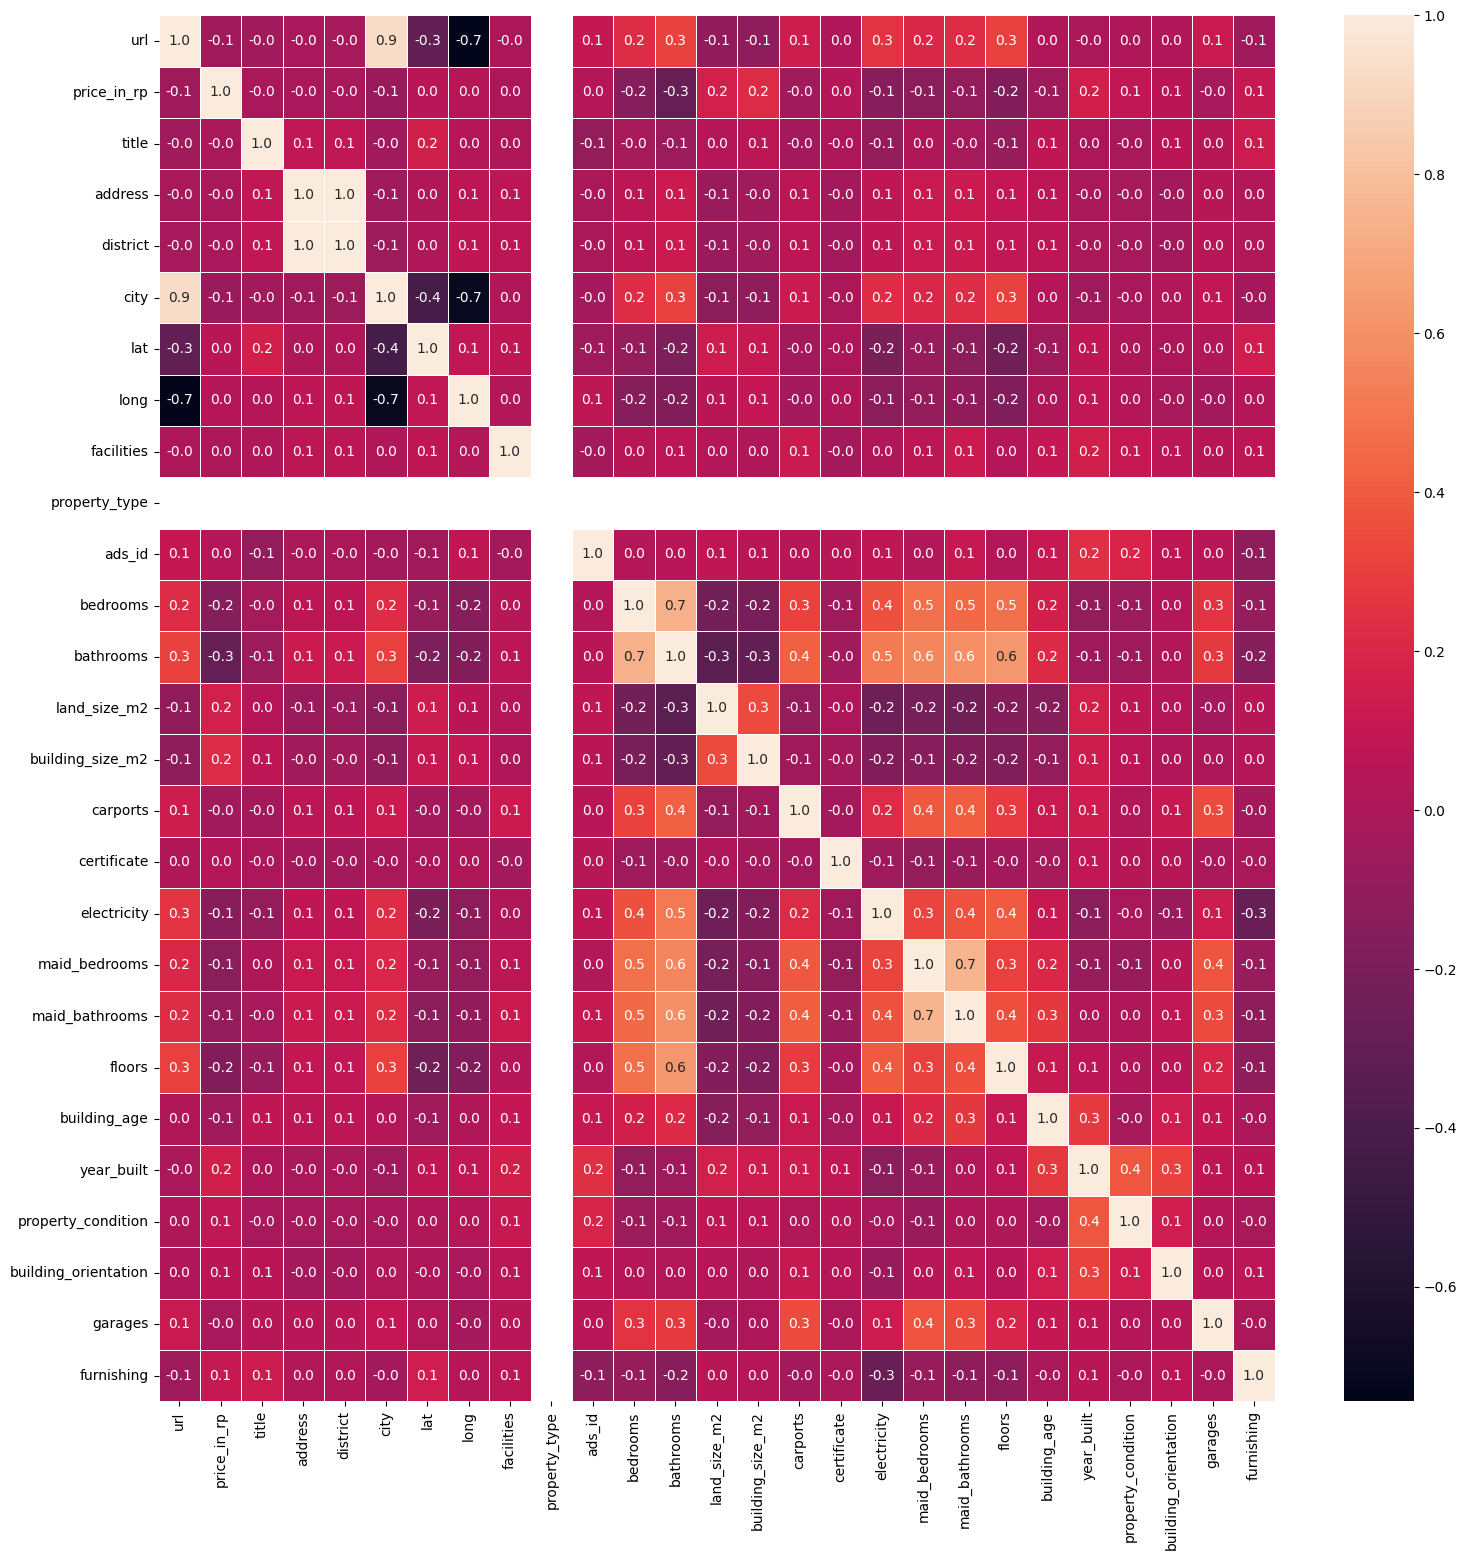

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#Remove columns that have a correlation with 'price_in_rp' below average
corr_matrix = data.corr()

avg_corr = corr_matrix['price_in_rp'].mean()

cols_to_drop = corr_matrix.loc[(corr_matrix['price_in_rp'] < avg_corr) & 
                               (corr_matrix.index != 'price_in_rp') & 
                               (corr_matrix.index != 'long') & 
                               (corr_matrix.index != 'lat')].index

cols_to_drop = cols_to_drop.union(['property_type'])

# Menghapus kolom dari data
data = data.drop(cols_to_drop, axis=1)

In [ ]:
data.head(1)

,price_in_rp,lat,long,ads_id,land_size_m2,building_size_m2,certificate,year_built,property_condition,building_orientation,furnishing
0,212,96,302,2350,162,138,4,34,1,0,4


Multivariate Analysis

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Melakukan PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# Hasil PCA
print(principalComponents)

[[-900.73541161  -95.68024319]
 [1030.17561784 -118.7979037 ]
 [1031.14812017 -216.30713293]
 ...
 [-873.05148427  264.72653327]
 [-865.78419364  270.11585509]
 [-858.43425347  211.08675836]]


Unvariate Analysis

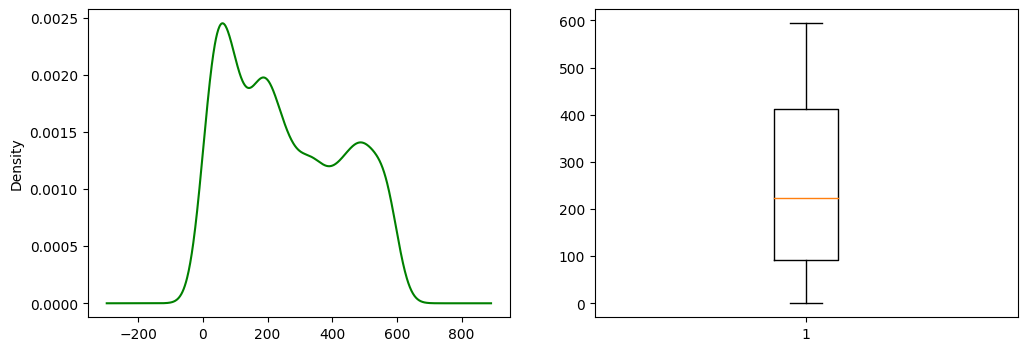

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['price_in_rp'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['price_in_rp'])
plt.show()

* Mean and median of price_in_rp centered around the value 0

NOTE
https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf
https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf
https://medium.com/sysinfo/dasar-dasar-machine-learning-f93732a566a


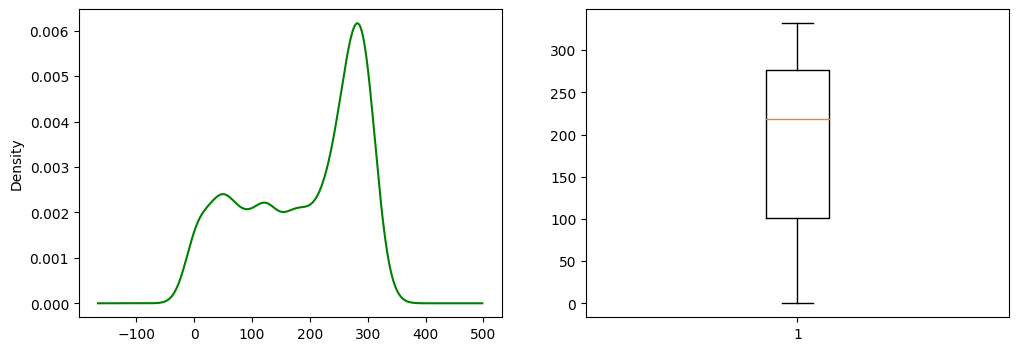

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['lat'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['lat'])
plt.show()

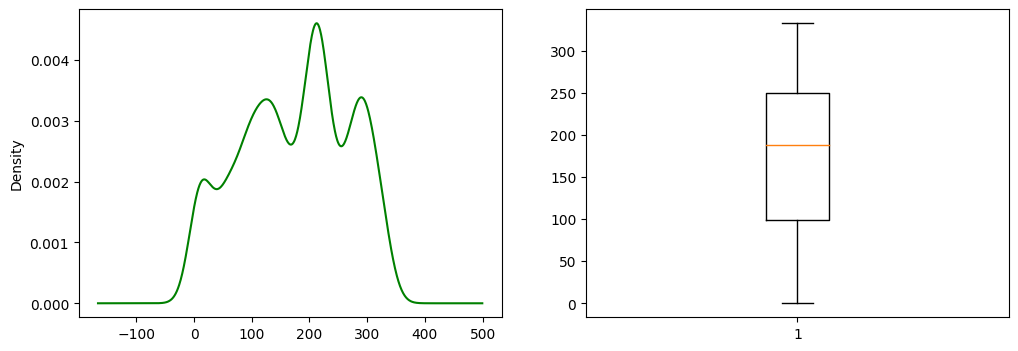

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['long'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['long'])
plt.show()

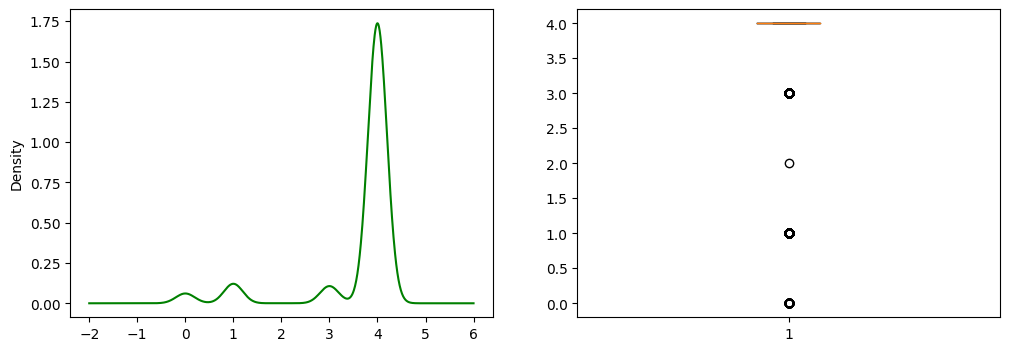

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['certificate'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['certificate'])
plt.show()

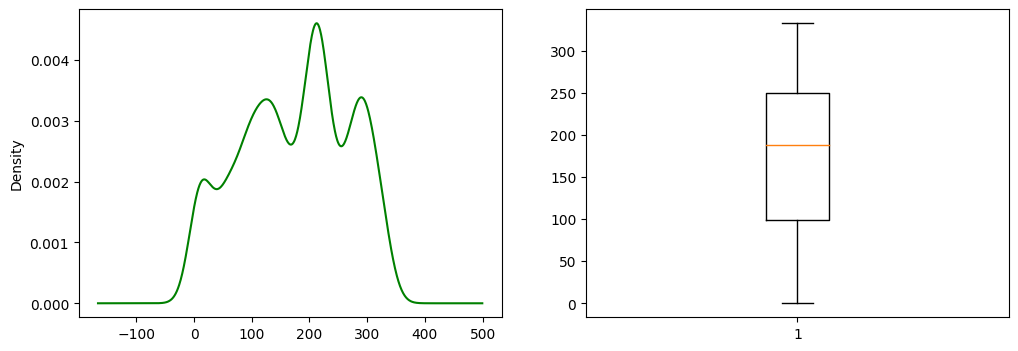

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['long'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['long'])
plt.show()

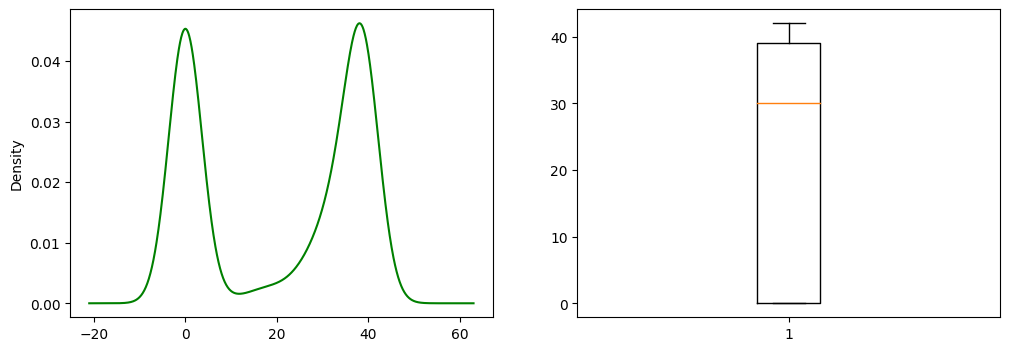

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['year_built'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['year_built'])
plt.show()

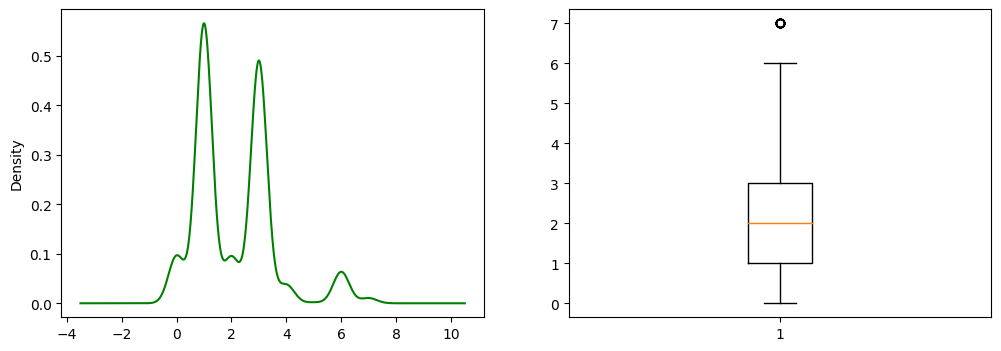

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['property_condition'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['property_condition'])
plt.show()

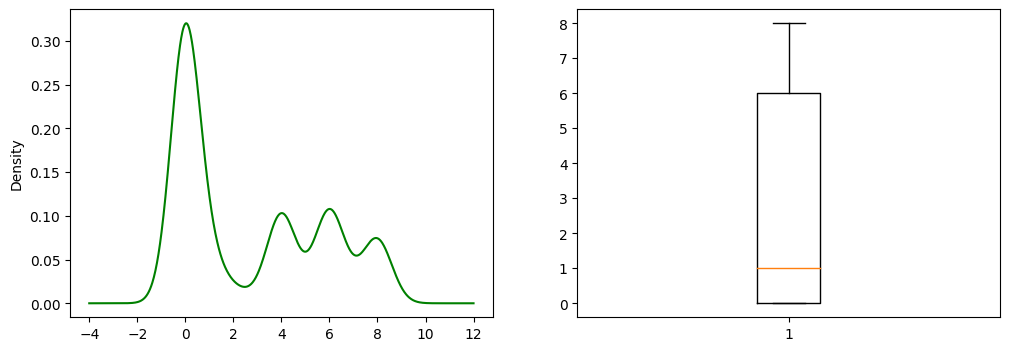

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['building_orientation'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['building_orientation'])
plt.show()

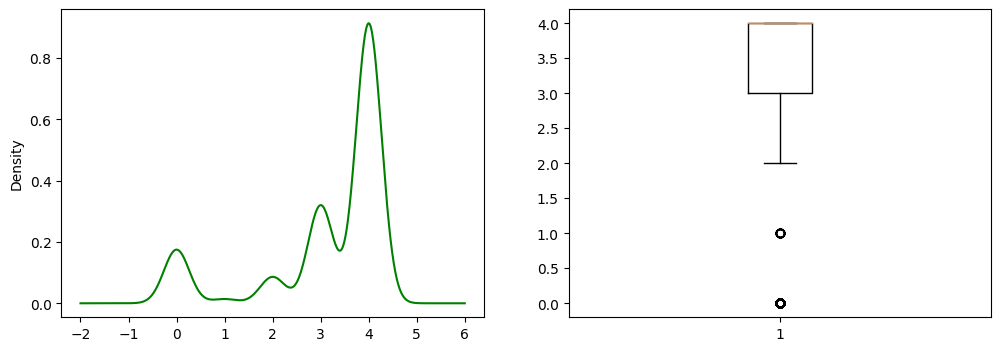

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data['furnishing'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(data['furnishing'])
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Mengidentifikasi outlier menggunakan metode Z-score
z_scores = np.abs((data - data.mean()) / data.std())
outliers = (z_scores > 3).any(axis=1)

# Menampilkan outlier
data[outliers]


,price_in_rp,lat,long,ads_id,land_size_m2,building_size_m2,certificate,year_built,property_condition,building_orientation,furnishing
14,182,96,302,905,73,96,0,31,6,4,4
33,196,181,291,2137,62,54,0,0,1,0,4
75,223,45,295,204,252,277,0,32,1,8,2
285,166,176,328,2161,130,158,0,31,1,0,4
323,146,79,314,2184,9,24,0,39,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...
3346,214,40,26,2822,23,93,0,0,3,0,3
3392,263,199,14,512,37,48,0,0,2,8,0
3394,187,199,14,1008,33,316,0,32,6,8,3
3403,210,194,18,1777,50,125,0,34,1,4,0


In [ ]:
import pandas as pd

# Misalkan 'data' adalah DataFrame Anda
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menghapus outlier
df_no_outliers = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# data.to_csv("data_preprocess.csv", index=False)

In [ ]:
data

,price_in_rp,lat,long,ads_id,land_size_m2,building_size_m2,certificate,year_built,property_condition,building_orientation,furnishing
0,212,96,302,2350,162,138,4,34,1,0,4
1,43,96,302,417,331,275,1,0,1,0,0
2,130,96,302,421,33,35,1,0,1,0,4
3,230,96,302,703,111,76,4,33,2,8,4
4,309,96,302,507,223,95,4,30,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...
3548,403,202,65,2395,377,185,4,39,3,0,2
3549,505,177,20,2321,407,255,4,39,3,8,4
3550,489,177,20,2319,395,255,4,39,3,8,4
3551,512,185,39,2312,347,268,4,39,3,4,2
